In [1]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import time
import sys
import random
import itertools

# Fock Space Framework :

Any generic many-body Hamiltonian  will have an interaction term + disordered terms and hopping term. 

\begin{equation}\label{Many-body_H}
    H = \sum \limits_{i=1}^L \underbrace{\sigma^x_i \sigma_{i+1}^x + \sigma^y_{i} \sigma_{i+1}^y + h_i \sigma_i^z }_{\text{Anderson Hamiltonian}} + \underbrace{\sigma^z_i \sigma^z_{i+1}}_{\text{interaction}}
\end{equation}

The first term with hopping term and on-site disorder is the Anderson Hamiltonian. It represents a single particle hopping on a real space lattice having on-site disorders.

A many-body Hamiltonian can be mapped to a single particle Hamiltonian when written on a Fock space basis. 

\begin{equation}
    H =\sum \limits_{K=1}^{2^L}  \epsilon_K |{K}\rangle \langle{K}|+ \sum \limits_{\substack{J\\K\neq J}} t_{K,J} |{J}\rangle\langle{K}|
\end{equation}

where the first term is the on-site disorder and the second is the hopping term in the Fock space lattice. 

This is like a single particle hamiltonian. Such a fock space is an L-dimensional hypercube with the connectivity of L edges. Each node is a product state of $\sigma_z$ configurations in real space lattice. In general, $\sigma_i^z|{K} \rangle= S_{i,K}|{K} \rangle = \pm 1|{K}\rangle$ corresponding of spin up(+1) or spin down(-1) states.


<div>
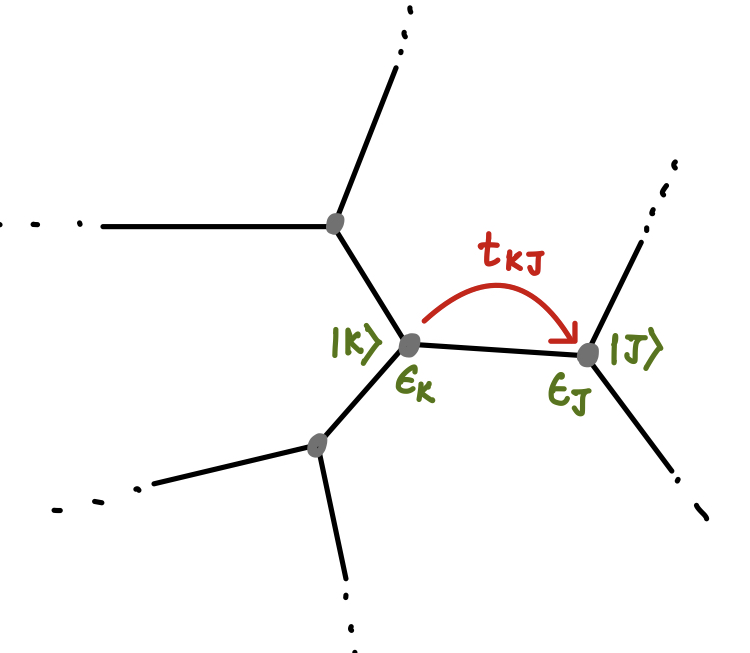
</div>

# The Model used and Correlations!

## Model

Here we have used a periodically changing Hamiltonian mentioned in paper [PhysRevB.94.224202](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.94.224202).

We alternatively drive the system by two Hamiltonians denoted by $H_x$ and $H_z$.

$H_z$ Hamiltonian introduces the nearest neighbour interaction along the z-direction and disordered magnetic field along the z-direction. The randomness is due to the $G_i$ which takes random values from a normal distribution. $H_x$ is a transverse field magnetic field. 
In this model, the tuning parameter is $\Gamma$. For Gamma less than $\Gamma_c \approx 0.3$, the system is in the many-body localised phase, and for Gamma values higher than $\Gamma_c $ the system is in the ergodic phase. For $\Gamma = 1 $ the system is in absence of disorder and is highly delocalised. For $\Gamma = 0 $ system is in highly localised region. We would like to understand the dynamics in between these two limits of $\Gamma$ (ergodic region)

\begin{equation}
    \begin{split}
        H(t+T) &= H(t)\\
        H_z &= \sum \limits_{i=1}^{L} \sigma_i^z \sigma_{i+1}^z + \sum \limits_{i=1}^{L}(h + g\sqrt{1- \Gamma^2}G_i )\sigma_i^z\\
        H_x &= g\Gamma \sum \limits_{i=1}^L \sigma_i^x
    \end{split}
\end{equation}


Parameters: g = 0.9045 , h = 0.8090, $\tau = 0.8$

The floquet operator for this model is given by :

\begin{equation}
   U_{F} = \exp(iH_x \tau) \exp(iH_z\tau)  = U_x U_z
\end{equation}


For $U_z$, we can just elementwise multiply the diagonal vector with the matrix as this unitary is actually diagonal.

for the $U_x $ part we can actually deal in the following way :

$$\displaystyle U_x  =  \exp ({-ig \Gamma \sum \limits _{j=1}^{L} \sigma_{j}^{x} \tau})$$


let say L=3

$$U_x = exp({(-ig \tau \Gamma)(\sigma_x\otimes\mathbb{I}\otimes \mathbb{I} + \mathbb{I}\otimes \sigma_x \otimes \mathbb{I}+\mathbb{I}\otimes \mathbb{I} \otimes \sigma_x)})$$

Now, notice that $\sigma_x\otimes\mathbb{I}\otimes \mathbb{I} , \mathbb{I}\otimes \sigma_x \otimes \mathbb{I},\mathbb{I}\otimes \mathbb{I} \otimes \sigma_x$ commutes with each other. 

So using $$e^{A+B} = e^A.e^{B}e^{[A,B]}$$

So, we can write $U_x$ as: 

$$\displaystyle U_x = \Pi_{i=0}^{L-1} exp({-ig\Gamma \tau (\sigma_x^i))} = \Pi_i (cos(g\Gamma \tau )\mathbb{I} - isin(g\Gamma \tau )\sigma_x^i))$$


$\sigma_i^x$ will change the state each time. Sigmax part of hamiltonian will have 1 in different locations of the matrix. All it is doing is flipping the items of the state vector to different positions. To minimize the computation time and complexity and effective use of memory, we remove the Sigmax matrix and just write a function that gives the new flipped matrix used as flip function in the code below.


## Auto-correlation function

Auto-correlation function is the correlation of spin at any site to the spin state at the same site but in a different time. Any many-body disorder system exhibits two phases namely ergodic and many-body localised state. In an ergodic phase, the system entirely forgets about its initial state, But in the many-body localised phase the system remembers the initial state. The memory of the system is measured by the autocorrelation function defined as :

\begin{equation}
c_i(t) = \langle {\psi(0) }|\sigma_i^z(t)\sigma_i^z(0)| {\psi(0)} \rangle
\end{equation}


We can also define the average autocorrelation function as :

\begin{equation}
c(t) = \sum \limits_{i=1}^{L} \frac{1}{L} c_i(t) 
\end{equation}

After some analytical calculations it will result in the following equation and on averaging the auto-correlation function over many disorder realisations.

\begin{equation}
    \overline{c(t)} = 1 - \frac{2}{L} \sum \limits_{r=1}^{L} r \overline{G(r,t)} 
\end{equation}


where $G(r,t)$ is the fock space correlator defined as :
\begin{equation}
    G(r,t)  :=  \sum \limits_{\alpha=1}^{N_r} |\langle{K_\alpha}|U(t) |{I} \rangle|^2
\end{equation}

where $N_r$ is a number of states which are at hamming distance r from the initial state.

The weight of the evolved state $U(t) |{I}\rangle$ after some time t over any other state $|{K_\alpha}\rangle$ which is at distance r, will be $|\langle{I} | U(t) |{K_\alpha}\rangle |^2$. However, there are $N_r$ states which will be at distance r from the initial state  $|{I}\rangle$. The weight on each of these won't be equal for a particular on-site disorder in real space, as the different spins will experience different magnetic field strengths. However, if we average over many disorder realisations then these weights will be almost the same (up to some order)

We want to calculated fock space correlator in this code. At the end we will also find the r_mean



In [2]:
L= 10
gamma = 0.4
g = 0.9045
h = 0.8090
J = 1 
tau = 0.8
ndis = 10   #no of disorders you want to average over
time_steps = 10000
seeds = 0

In [3]:
#----------flip function-----------:
index = np.arange(2**L)  
x_flip = np.zeros([L,2**L],dtype='int32') 

# x_flips has all the exchanges that will occur when each sigma_x will act on the state. 
for flip_site in range(L):
    m = L-flip_site  
    x_flip[flip_site,:] = (index+2**(m-1))%2**m + 2**m*(index/2**m).astype('int') 

In [4]:
# generate all the possible configurations of spins and each configuration is a state in fock space.

configlist = (-1)**np.array(list(itertools.product([0,1],repeat=L)))

In [5]:
#---- Term-1 of Hz--------:
Hz1 = np.sum((configlist*np.roll(configlist,-1,1)),axis=1)

#An empty array that stores the value of fock space correlator at each time step.
G_rt = np.zeros((time_steps+1,L+1,ndis)) # empty array to store G_IK values
    
for nd in range(ndis):  # loop over no of disorders you want to average over.

    #-------------Initial_state-----------:
    state_number = random.randint(0,(2**L)-1)  # choose any random initial state
    initial_state = np.zeros(2**L,dtype=complex) # This gives us 1D array of initial_state
    initial_state[state_number] = complex(1,0) # puts 1+0j on state number site.
    
    #-----------hamming indices-array -----------:
    
    #its an array of hamming distance of all the states from our initialsed state
    r_array=np.sum(np.abs(configlist - configlist[state_number,:])//2,axis=1) 

    
    # store the indices of states in sperate arrays which are at distance r=0 to r =L
    hamming_index = []
    for i in range(L+1):
        hamming_index.append(np.where(r_array==i)[0])

    state = initial_state.copy()
    np.random.seed(seeds+nd)
    G = np.random.standard_normal(L)   # random number G_ij
    
    # term-2 of Hz 
    Hz2 = np.dot(configlist,h+g*np.sqrt(1-gamma**2)*G)
    
#-----------------------------------Time Evolution----------------------------------------------------
    
    # time evolution due to Hz term
    U2 = np.exp(complex(0,-1)*tau*(J*Hz1+Hz2)) 
   
    for ham_dist in range(L+1):                
        G_rt[0][ham_dist] = np.sum(np.power(np.abs(state[hamming_index[ham_dist]]),2)) #creates G_rt for each r
       
    
    # time evolution for each time steps and storing the value of G(r,t) for each distance and time
    for t in range(1,time_steps+1): 
        
        #time evolve with U2
        state = U2*state  
            
        # time evolve with U1
        for flip_site in range(L):
            state = np.cos(g*gamma*tau)*state -1j*np.sin(g*gamma*tau)*state[x_flip[flip_site]]
                          
        # sum of all the contributions from each state which are at distance r
        for ham_dist in range(L+1):                
            G_rt[t][ham_dist][nd] = np.sum(np.power(np.abs(state[hamming_index[ham_dist]]),2))
    

# r_mean 

$$ \displaystyle \langle r \rangle = \sum \limits_{r=0}^{L} r G(r,t)$$

where 
- r is hamming distance 

- G(r,t) is fock space correlators

In [7]:
Gmean = np.mean(G_rt,2)

np.savez_compressed('Gmean'+str(L)+'_gamma_'+str(gamma)+'_seeds_'+str(seeds)+'.npz',x = Gmean)

# to find the mean distance:
ham_distance=np.arange(0,L+1)
rmean = np.dot(Gmean,ham_distance)

np.savetxt('rmean'+str(L)+'_gamma_'+str(gamma)+'_seeds_'+str(seeds)+'.txt',rmean)